# Final-Lab

## Packages nécessaire

In [3]:
import seaborn as sns
import pandas as pd
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Analyse des données

In [4]:
# Récupération des données
data = pd.read_csv("Tobacco3482.csv")
print (" Le nombre d'article ", len(data))


 Le nombre d'article  3482


In [5]:
data.sample(10)

,img_path,label
2141,Memo/2051691699_2051691700.jpg,Memo
3182,Resume/50553047-3048.jpg,Resume
1178,Form/506483587_506483588.jpg,Form
1324,Letter/13010826_13010827.jpg,Letter
1667,Letter/516028154+-8154.jpg,Letter
1471,Letter/504334188_504334189.jpg,Letter
3162,Resume/50497931-7932.jpg,Resume
1220,Form/522691957+-1957.jpg,Form
97,Advertisement/2084420704.jpg,Advertisement
2745,Note/2048858141.jpg,Note


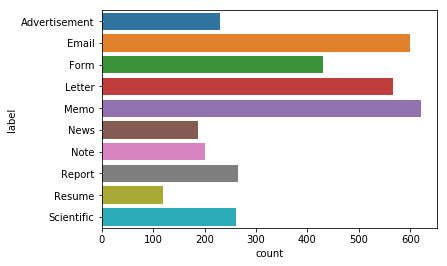

In [6]:
# Afficher les statistiques des labels
sns.countplot(data=data, y = 'label')


In [7]:
# Récupération des fichiers
Classes = os.listdir('data/Tobacco3482-OCR' )

text=[]
Contenus=[]
label=[]

# Le nombre de classes
c = len(Classes)
for i in range(c):
    # Récupération des fichiers txt de chaque classe
    Contenus.append(os.listdir('data/Tobacco3482-OCR/%s' %Classes[i]))
    
    # OUvrir les fichiers txt et récupérer le texte 
    for j in range(len(Contenus[i])):
        op=open('data/Tobacco3482-OCR/%s/%s' %(Classes[i],Contenus[i][j]), encoding="utf8")
        text.append(op.read())
        label.append(Classes[i])

In [8]:
#%% Création d'une dataframe
       
DF=pd.DataFrame()
DF['text'] = text
DF['label'] = label

In [9]:
DF[:10]

,text,label
0,A Mpertant as yar\nsesiye teaetered cabiieess....,Advertisement
1,TE che fitm\n\nm66400 7127\n\nKOOLS are the on...,Advertisement
2,so ARN Rr nr\n\nBWR Ga ||\n\nVending Operators...,Advertisement
3,"MARCH 24,19 VO — 3. Tersrearep\n\n \n\n‘ yi il...",Advertisement
4,~\n\nSpend a milder moment qs\nwith Raleigh.\n...,Advertisement
5,SR Onrel ules cee\nNee dss\n\nThe one tales WT...,Advertisement
6,&\nBR. :\ner non\n\nbe 4\nop Re eo eee ee eee ...,Advertisement
7,{ae} BUIseaUT OY |\n--uoanyf{sanosdun |.\nLIYL...,Advertisement
8,". “So that’s he\nany newspapel\n“That's how,\n...",Advertisement
9,"BROWN & “WILLIAM ON:\n\n;, mY To Man\n\nMarfan...",Advertisement


## Split the Database

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(DF.text, DF.label, test_size=0.20, 
                                                random_state=1)

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.20, 
                                                random_state=1)

print('nb apprentissage :' ,X_train.shape)
print('nb test:', X_test.shape)
print('nb validation:', X_dev.shape)


nb apprentissage : (2228,)
nb test: (697,)
nb validation: (557,)


## Vectorisation

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)
vectorizer.fit(X_train)

X_train_vect = vectorizer.transform(X_train)
X_test_vect= vectorizer.transform(X_test)
X_dev_vect= vectorizer.transform(X_dev)

print('nb apprentissage :' ,X_train_vect.shape)
print('nb test:', X_test_vect.shape)
print('nb validation:', X_dev_vect.shape)


nb apprentissage : (2228, 3000)
nb test: (697, 3000)
nb validation: (557, 3000)


## Représentation Tf-IDF 

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(X_train_vect)

#transformation tf-idf des ensemble train et test
X_train_tf = tf_transformer.transform(X_train_vect)
X_test_tf = tf_transformer.transform(X_test_vect)
X_dev_tf = tf_transformer.transform(X_dev_vect)

## Naive Bayes

In [13]:
# On entraine nos Naives Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vect, y_train)

# Observasion de la prédiction
predictions1 = model.predict(X_train_vect)
predictions2 = model.predict(X_test_vect)
predictions3 = model.predict(X_dev_vect)

accuracy = accuracy_score(predictions1, y_train)
print('Le score obtenu pour les données d app:',accuracy*100,'%' )
accuracy = accuracy_score(predictions2, y_test)
print('Le score obtenu pour les données de test:',accuracy*100,'%' )
accuracy = accuracy_score(predictions3, y_dev)
print('Le score obtenu pour les données de val:',accuracy*100,'%' )

Le score obtenu pour les données d app: 84.29084380610414 %
Le score obtenu pour les données de test: 72.02295552367288 %
Le score obtenu pour les données de val: 73.24955116696589 %


### Naive bayes with Tf-Idf representation

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tf, y_train)

# Observasion de la prédiction
predictions1 = model.predict(X_train_tf)
predictions2 = model.predict(X_test_tf)
predictions3 = model.predict(X_dev_tf)

accuracy = accuracy_score(predictions1, y_train)
print('Le score obtenu pour les données d app:',accuracy*100,'%' )
accuracy = accuracy_score(predictions2, y_test)
print('Le score obtenu pour les données de test:',accuracy*100,'%' )
accuracy = accuracy_score(predictions3, y_dev)
print('Le score obtenu pour les données de val:',accuracy*100,'%' )

Le score obtenu pour les données d app: 75.76301615798923 %
Le score obtenu pour les données de test: 66.42754662840747 %
Le score obtenu pour les données de val: 67.3249551166966 %


               precision    recall  f1-score   support

Advertisement       0.56      0.67      0.61        45
        Email       0.97      0.94      0.96       125
         Form       0.75      0.81      0.78        91
       Letter       0.69      0.68      0.68       108
         Memo       0.65      0.71      0.68       132
         News       0.56      0.63      0.59        30
         Note       0.48      0.31      0.38        39
       Report       0.58      0.51      0.54        55
       Resume       0.96      1.00      0.98        26
   Scientific       0.74      0.61      0.67        46

  avg / total       0.72      0.72      0.72       697



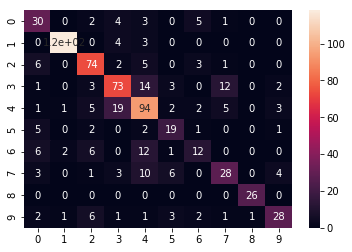

In [49]:
# Affichage du rapport de classification et de la matrice de confusion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model.predict(X_test_vect)))
cm = confusion_matrix(y_test, model.predict(X_test_vect))
sns.heatmap(cm, annot = True)

## Multi-Layer Perceptron

In [16]:
 #Definition du classifieur
classifier= MLPClassifier(alpha = 1)
classifier.fit(X_train_vect, y_train)


# Observasion de la prédiction
predictions1 = classifier.predict(X_train_vect)
predictions2 = classifier.predict(X_test_vect)
predictions3 = classifier.predict(X_dev_vect)

accuracy = accuracy_score(predictions1, y_train)
print('Le score obtenu pour les données d app:',accuracy*100,'%' )
accuracy = accuracy_score(predictions2, y_test)
print('Le score obtenu pour les données de test:',accuracy*100,'%' )
accuracy = accuracy_score(predictions3, y_dev)
print('Le score obtenu pour les données de val:',accuracy*100,'%' )

Le score obtenu pour les données d app: 98.33931777378815 %
Le score obtenu pour les données de test: 78.33572453371592 %
Le score obtenu pour les données de val: 78.63554757630162 %


### MLP with TF-IDF representation

In [15]:
 #Definition du classifieur
classifier= MLPClassifier(alpha = 1)
classifier.fit(X_train_tf, y_train)


# Observasion de la prédiction
predictions1 = classifier.predict(X_train_tf)
predictions2 = classifier.predict(X_test_tf)
predictions3 = classifier.predict(X_dev_tf)

accuracy = accuracy_score(predictions1, y_train)
print('Le score obtenu pour les données d app:',accuracy*100,'%' )
accuracy = accuracy_score(predictions2, y_test)
print('Le score obtenu pour les données de test:',accuracy*100,'%' )
accuracy = accuracy_score(predictions3, y_dev)
print('Le score obtenu pour les données de val:',accuracy*100,'%' )

Le score obtenu pour les données d app: 82.54039497307002 %
Le score obtenu pour les données de test: 73.60114777618364 %
Le score obtenu pour les données de val: 75.04488330341114 %


               precision    recall  f1-score   support

Advertisement       0.56      0.67      0.61        45
        Email       0.97      0.94      0.96       125
         Form       0.75      0.81      0.78        91
       Letter       0.69      0.68      0.68       108
         Memo       0.65      0.71      0.68       132
         News       0.56      0.63      0.59        30
         Note       0.48      0.31      0.38        39
       Report       0.58      0.51      0.54        55
       Resume       0.96      1.00      0.98        26
   Scientific       0.74      0.61      0.67        46

  avg / total       0.72      0.72      0.72       697



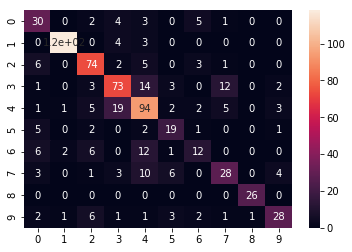

In [48]:
# Affichage du rapport de classification et de la matrice de confusion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model.predict(X_test_vect)))
cm =confusion_matrix(y_test, model.predict(X_test_vect))
sns.heatmap(cm, annot = True)